In [ ]:
# 1 degree = 111320 meter
# https://en.wikipedia.org/wiki/Decimal_degrees

In [453]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

host = '172.17.0.2'
port = '5432'
dbname = 'postgres'
username = 'postgres'
pwd = 'kpass'

conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))

# radius in decimal degree
r = (1/111320) * 300
# latlon
lon = '-73.982592'
lat = '40.692050'

sql = "select * \
        from final \
        where ST_Intersects(ST_GeomFromText(final.the_geom), ST_Buffer( \
            ST_GeomFromText('Point({} {})'),{}));".format(lon, lat, r)

# sql = "select * from final"

dat = sqlio.read_sql_query(sql, conn)
# conn = None

In [337]:
import geopandas as gpd
from shapely import wkt

dat['the_geom'] = dat['the_geom'].apply(wkt.loads)
dat = gpd.GeoDataFrame(dat, geometry='the_geom')
dat.crs = {'init': 'epsg:4326', 'no_defs': True}

In [344]:
# 1 mile = 1609.34 meter
import folium

m = folium.Map(location=[float(lat), float(lon)], zoom_start=14, tiles='cartodbpositron')
folium.Choropleth(geo_data=dat.the_geom, fill_color='Red', fill_opacity=0.7).add_to(m)
for i in [300, 500, 700]:
    folium.Circle([float(lat), float(lon)], i, fill=True).add_to(m)
m

In [345]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [296]:
def somack(vid):
    vid = vid
    yy = ['2013', '2015', '2017']

    result = []
    for y in yy:
        sql = "select * from acs where vid = '{}' and year = '{}'".format(vid, y)
        acs = sqlio.read_sql_query(sql, conn)
        result.append(sum(dat.merge(acs,on='cd').nb.astype(float)))
    return result

## Ethnic group

In [ ]:
ethnic = ['B01001A_001E', 'B01001B_001E','B01001D_001E]

In [308]:
white = somack('B01001A_001E')
black = somackME')
asian = somack('B01001D_001E')

In [303]:
labels = 'White', 'Black', 'Asian'

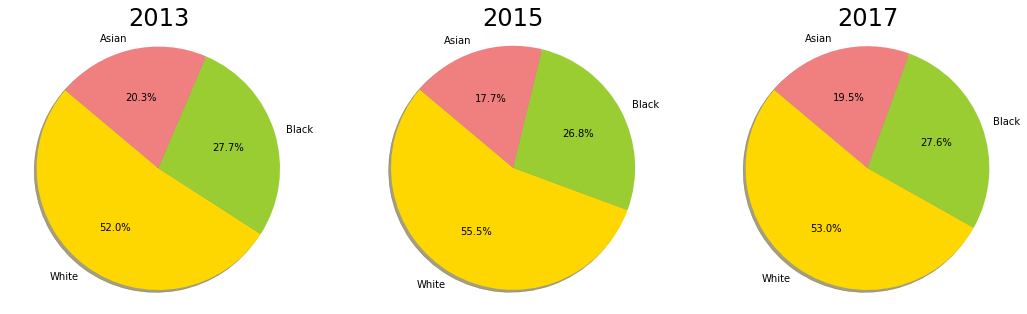

In [354]:
f, ax = plt.subplots(1, 3,figsize=(18,5))
year = ['2013', '2015', '2017']
for i in range(0,3):
    labels = 'White', 'Black', 'Asian'
    sizes = [white[i], black[i], asian[i]]
    colors = ['gold', 'yellowgreen', 'lightcoral']#, 'lightskyblue']

    # Plot
    ax[i].pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    ax[i].axis('equal')
    ax[i].set_title(year[i], fontsize=24)

## Population

In [358]:
male_age = ['B01001_003E',
 'B01001_004E',
 'B01001_005E',
 'B01001_006E',
 'B01001_007E',
 'B01001_008E',
 'B01001_009E',
 'B01001_010E',
 'B01001_011E',
 'B01001_012E',
 'B01001_013E',
 'B01001_014E',
 'B01001_015E',
 'B01001_016E',
 'B01001_017E',
 'B01001_018E',
 'B01001_019E',
 'B01001_020E',
 'B01001_021E',
 'B01001_022E',
 'B01001_023E',
 'B01001_024E',
 'B01001_025E']

female_age = ['B01001_027E',
 'B01001_028E',
 'B01001_029E',
 'B01001_030E',
 'B01001_031E',
 'B01001_032E',
 'B01001_033E',
 'B01001_034E',
 'B01001_035E',
 'B01001_036E',
 'B01001_037E',
 'B01001_038E',
 'B01001_039E',
 'B01001_040E',
 'B01001_041E',
 'B01001_042E',
 'B01001_043E',
 'B01001_044E',
 'B01001_045E',
 'B01001_046E',
 'B01001_047E',
 'B01001_048E',
 'B01001_049E']

In [359]:
dfs = []
for vid in male_age:
    sql = "select * from acs where vid = '{}' and year = '{}'".format(vid, y)
    acs = sqlio.read_sql_query(sql, conn)
    dfs.append(acs)
    
for vid in female_age:
    sql = "select * from acs where vid = '{}' and year = '{}'".format(vid, y)
    acs = sqlio.read_sql_query(sql, conn)
    dfs.append(acs)

In [363]:
df = pd.concat(dfs, axis=0)

In [367]:
df.nb = df.nb.astype(float)